In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


# Phase 1: Data Inspection & Structural Audit

In [ ]:
# Load data
df = pd.read_csv("train.csv")

df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [68]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

print(f"Numerical features: {len(numerical_features)}")
print(f"Categorical features: {len(categorical_features)}")

Numerical features: 38
Categorical features: 43


In [69]:
saleprice = df['SalePrice']

print("Mean:", saleprice.mean())
print("Median:", saleprice.median())
print("Skewness:", saleprice.skew())
print("Kurtosis:", saleprice.kurt())


Mean: 180921.19589041095
Median: 163000.0
Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


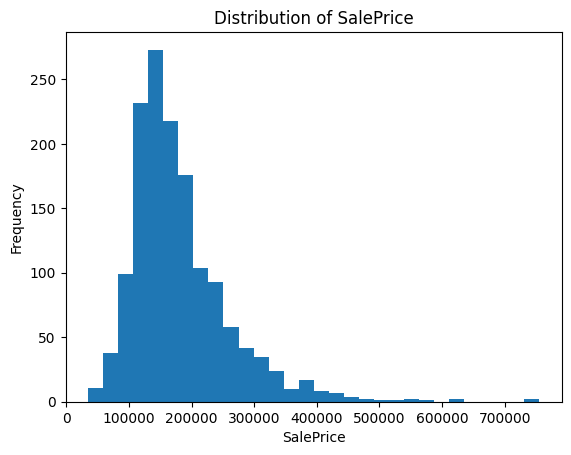

In [70]:
plt.figure()
plt.hist(saleprice, bins=30)
plt.title("Distribution of SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Frequency")
plt.show()


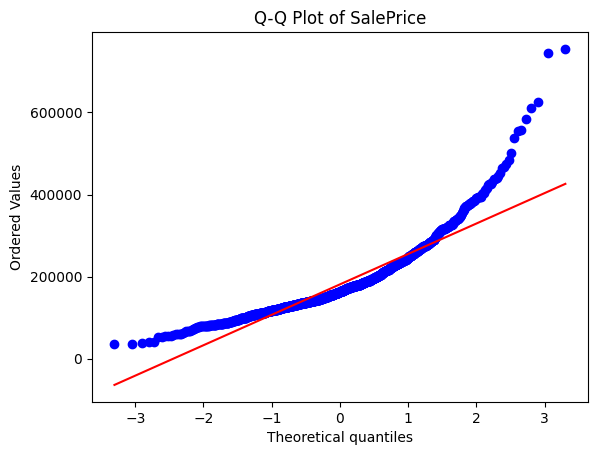

In [71]:
stats.probplot(saleprice, dist="norm", plot=plt)
plt.title("Q-Q Plot of SalePrice")
plt.show()


The SalePrice variable significantly deviates from the diagonal line at higher values, indicating a violation of the normality assumption.

In [72]:
df['SalePrice_log'] = np.log(df['SalePrice'])

In [73]:
df['SalePrice_log']

,SalePrice_log
0,12.247694
1,12.109011
2,12.317167
3,11.849398
4,12.429216
...,...
1455,12.072541
1456,12.254863
1457,12.493130
1458,11.864462


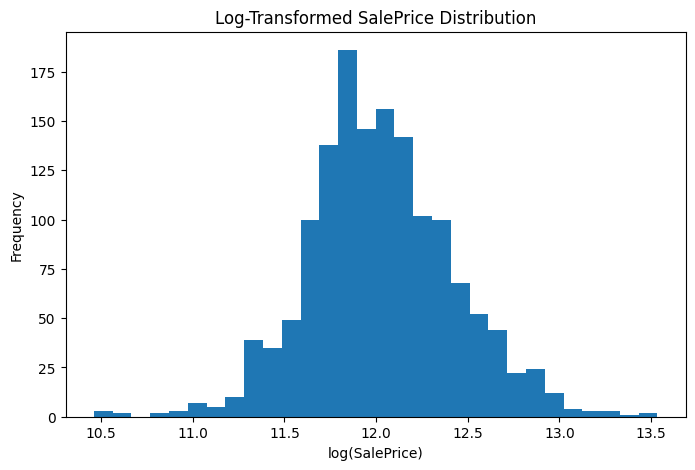

In [74]:
plt.figure(figsize=(8,5))
plt.hist(df['SalePrice_log'], bins=30)
plt.title("Log-Transformed SalePrice Distribution")
plt.xlabel("log(SalePrice)")
plt.ylabel("Frequency")
plt.show()


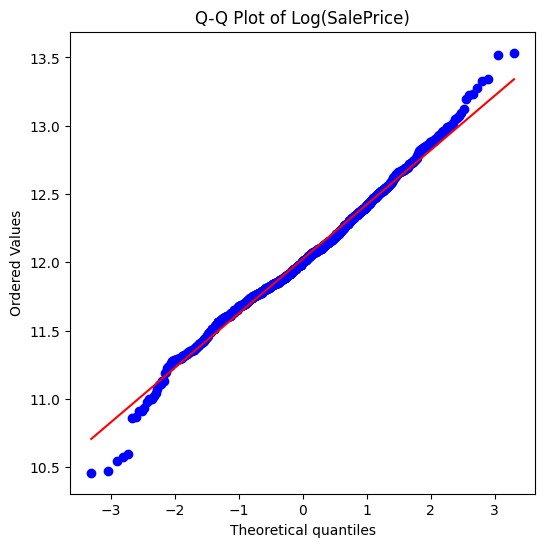

In [75]:
plt.figure(figsize=(6,6))
stats.probplot(df['SalePrice_log'], dist="norm", plot=plt)
plt.title("Q-Q Plot of Log(SalePrice)")
plt.show()

# Phase 2: The "Cleaning" Ritual

In [76]:
Q1 = df['SalePrice'].quantile(0.25)
Q3 = df['SalePrice'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

Q1: 129975.0
Q3: 214000.0
IQR: 84025.0
Lower Bound: 3937.5
Upper Bound: 340037.5


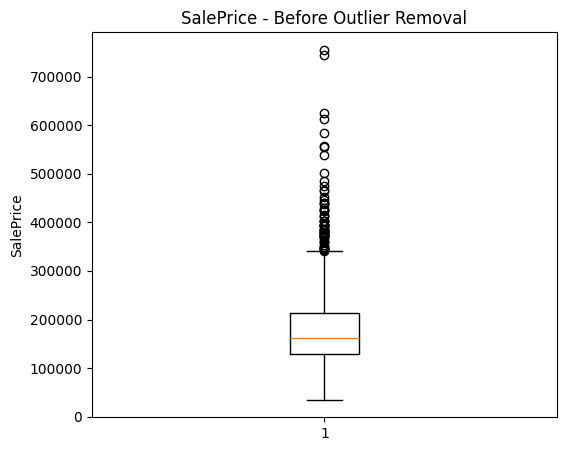

In [77]:
plt.figure(figsize=(6,5))
plt.boxplot(df['SalePrice'])
plt.title("SalePrice - Before Outlier Removal")
plt.ylabel("SalePrice")
plt.show()

In [78]:
df_clean = df[
    (df['SalePrice'] >= lower_bound) &
    (df['SalePrice'] <= upper_bound)
]
print("Original shape:", df.shape)
print("Cleaned shape:", df_clean.shape)

Original shape: (1460, 82)
Cleaned shape: (1399, 82)


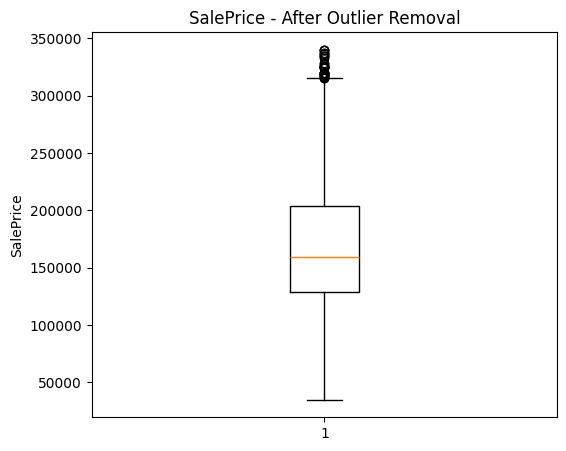

In [79]:
plt.figure(figsize=(6,5))
plt.boxplot(df_clean['SalePrice'])
plt.title("SalePrice - After Outlier Removal")
plt.ylabel("SalePrice")
plt.show()

# Phase 3: Multivariate Analysis & Visualization

In [80]:
numerical_features = df_clean.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df_clean[numerical_features].corr()

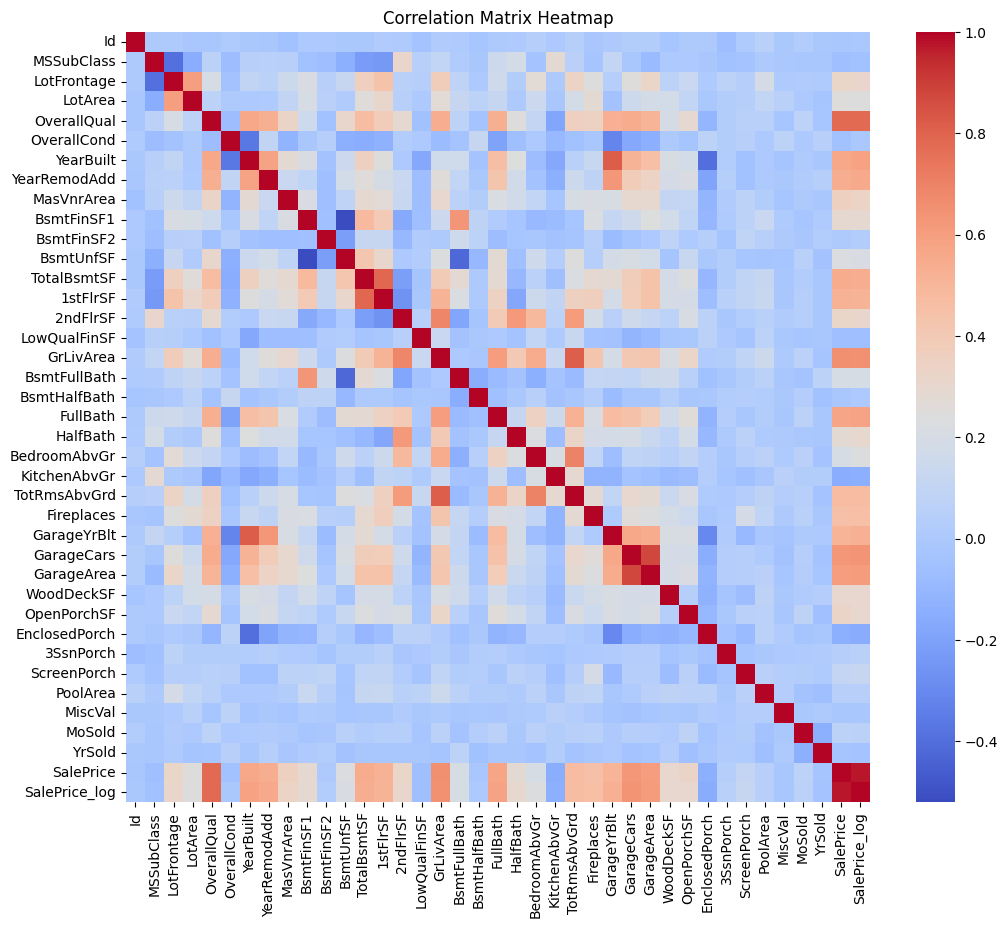

In [81]:
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()

In [82]:
corr_with_target = corr_matrix['SalePrice'].abs().sort_values(ascending=False)

top10_features = corr_with_target[1:11]
print(top10_features)

SalePrice_log    0.970421
OverallQual      0.784294
GrLivArea        0.661325
GarageCars       0.628013
GarageArea       0.607230
FullBath         0.577369
YearBuilt        0.564558
TotalBsmtSF      0.543508
YearRemodAdd     0.541161
1stFlrSF         0.522785
Name: SalePrice, dtype: float64


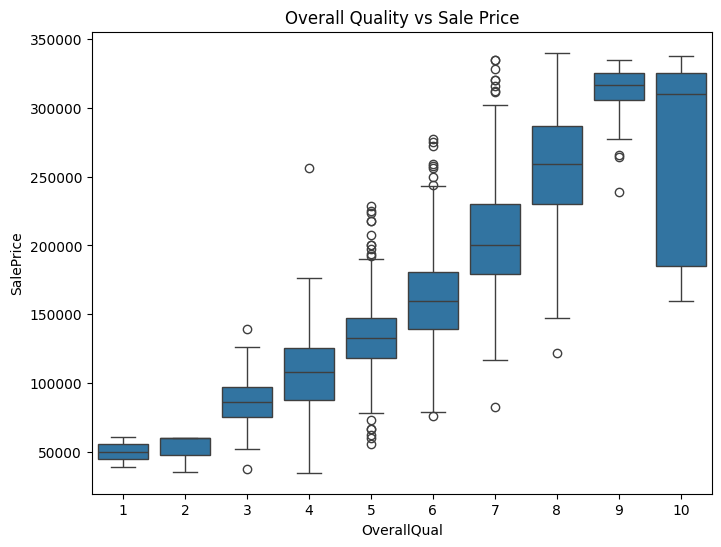

In [83]:
plt.figure(figsize=(8,6))
sns.boxplot(x='OverallQual', y='SalePrice', data=df_clean)
plt.title("Overall Quality vs Sale Price")
plt.show()

In [84]:
neighborhood_price = (
    df_clean
    .groupby('Neighborhood')['SalePrice']
    .mean()
    .sort_values(ascending=False)
)

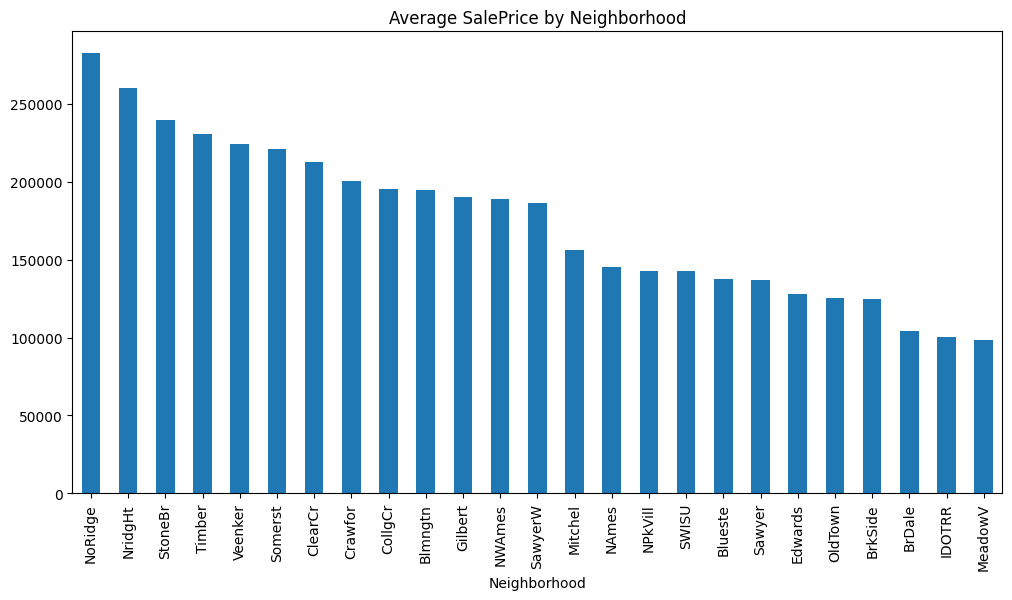

In [85]:
plt.figure(figsize=(12,6))
neighborhood_price.plot(kind='bar')
plt.title("Average SalePrice by Neighborhood")
plt.xticks(rotation=90)
plt.show()

# Phase 4: Final Insights & Reporting

## Top 3 Drivers of House Price

Based on correlation analysis:

1. OverallQual (0.784)
  - Strongest structural driver. Higher construction quality significantly increases house price.

2. GrLivArea (0.661)
- Larger above-ground living area leads to higher property value.

3. GarageCars (0.628)
- Garage capacity strongly impacts pricing, reflecting functional value.

## Anomaly & Missing Data Report

### Features with highest missing values:
- PoolQC (~99%)
- MiscFeature (~96%)
- Alley (~93%)
- Fence (~81%)
- FireplaceQu (~47%)
- LotFrontage (~18%)

### Impact on Future Model:
- Features with extremely high missing values (>80%) may need to be removed.
- Moderate missing features require imputation.
- Ignoring missing data may introduce bias and reduce model accuracy.

## Visual Summary (4 Most Impactful Charts)

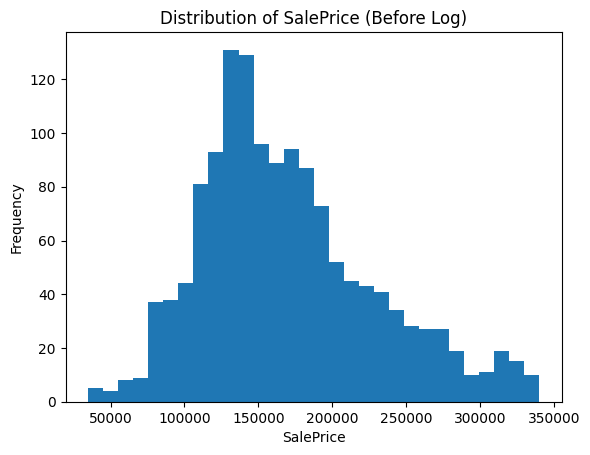

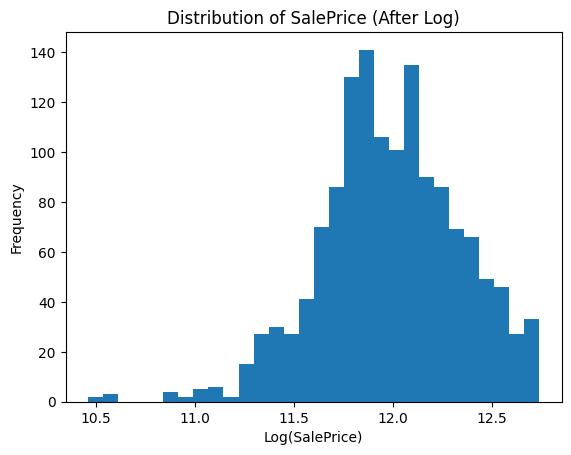

In [86]:
# Before Log
plt.figure()
plt.hist(df_clean['SalePrice'], bins=30)
plt.title("Distribution of SalePrice (Before Log)")
plt.xlabel("SalePrice")
plt.ylabel("Frequency")
plt.show()

# After Log
plt.figure()
plt.hist(df_clean['SalePrice_log'], bins=30)
plt.title("Distribution of SalePrice (After Log)")
plt.xlabel("Log(SalePrice)")
plt.ylabel("Frequency")
plt.show()

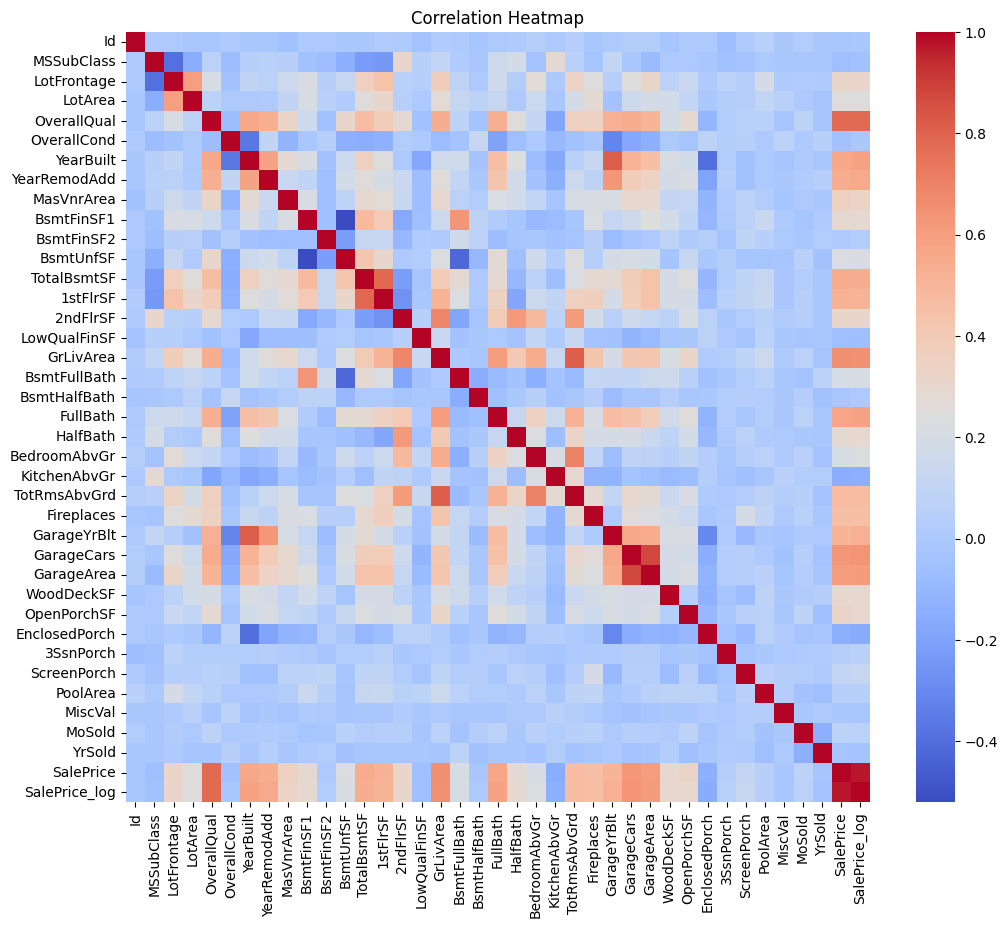

In [87]:
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

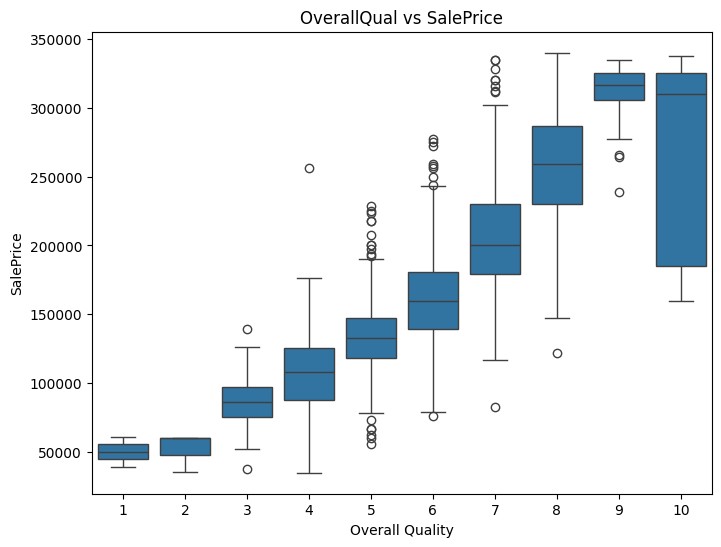

In [88]:
plt.figure(figsize=(8,6))
sns.boxplot(x='OverallQual', y='SalePrice', data=df_clean)
plt.title("OverallQual vs SalePrice")
plt.xlabel("Overall Quality")
plt.ylabel("SalePrice")
plt.show()

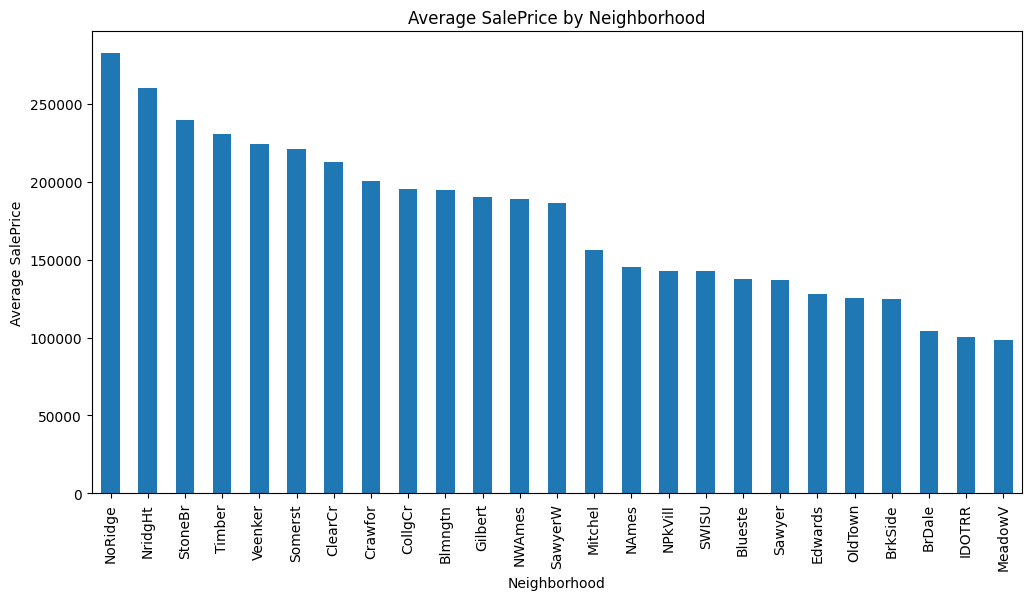

In [89]:
plt.figure(figsize=(12,6))
neighborhood_price.plot(kind='bar')
plt.title("Average SalePrice by Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Average SalePrice")
plt.xticks(rotation=90)
plt.show()